# Научно-исследовательский семинар "Анализ данных в Python"

# Тема 4: Исследование взаимосвязей переменных

* [1. Таблицы сопряжённости](#chapter1)
* [2. Тест Хи-квадрат](#chapter2)
* [3. Тесты на нормальность](#chapter3)
* [4. Парная корреляция](#chapter4)
* [5. Частная корреляция](#chapter5) 
* [6. Визуализация корреляций](#chapter6)

In [2]:
# !pip install pingouin

import pandas as pd
from scipy import stats
from math import sqrt
import matplotlib.pyplot as plt
import pingouin as pg
from scipy.stats import pointbiserialr, norm
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Источник данных:  [Global Innovation Index](https://www.wipo.int/en/web/global-innovation-index)

Файл WIPO-GII.xlsx содержит панельные данные за 3 года: 2020, 2021, 2022.

Список переменных:
- Business environment
- Business sophistication index
- Citable documents H-index
- Creative goods and services
- Creative goods exports, % total trade
- Creative outputs index
- Cultural and creative services exports, % total trade
- Domestic market scale, bn PPP in dollars
- Ease of getting credit
- Ease of starting a business
- Ecological sustainability
- Expenditure on education, % GDP
- Firms offering formal training, %
- General infrastructure
- Global Innovation Index
- Government effectiveness
- Government's online service
- Graduates in science and engineering, %
- Gross expenditure on R&D, % GDP
- High-tech exports, % total trade
- High-tech imports, % total trade
- High-tech manufacturing, %
- Human capital and research index
- Information and Communications Technology access
- Information and Communications Technology services exports, % total trade
- Information and Communications Technology services imports, % total trade
- Information and Communications Technology use
- Infrastructure index
- Intangible assets
- Joint venture/strategic alliance deals/bn PPP$ GDP
- Knowledge absorption
- Knowledge and technology outputs index
- Knowledge workers
- Knowledge-intensive employment, %
- Logistics performance
- Market sophistication index
- Mobile app creation/bn PPP in dollars GDP
- Online creativity
- PISA scales in reading, maths and science
- Political and operational stability
- Political environment
- Pupil-teacher ratio, secondary
- QS university ranking average score of top 3 universities
- Research and development (R&D)
- Scientific and technical articles/bn PPP in dollars GDP
- Software spending, % GDP
- Tertiary education
- Tertiary enrolment, % gross
- University-industry R&D collaboration
- Region
- Euro area
- European Union
- OECD members
- Least developed countries
- Income

In [4]:
df = pd.read_excel('WIPO-GII.xlsx')
df

,Country,Business environment_2020,Business environment_2021,Business environment_2022,Business sophistication index_2020,Business sophistication index_2021,Business sophistication index_2022,Citable documents H-index_2020,Citable documents H-index_2021,Citable documents H-index_2022,...,University-industry R&D collaboration_2021,University-industry R&D collaboration_2022,Region,Region2,Euro area,European Union,OECD members,Least developed countries,Income,High income
0,Cote d'Ivoire,70.8,70.8,48.3,19.7,20.9,21.8,6.3,6.1,5.1,...,38.1,38.5,Sub-Saharan Africa,Sub-Saharan Africa,0,0,0,0,middle income,0
1,Czechia,81.1,81.1,42.1,46.2,43.5,46.2,29.8,30.3,30.4,...,53.7,59.1,Europe & Central Asia,Europe,0,1,1,0,high income,1
2,"Egypt, Arab Rep.",65.0,65.0,45.0,18.7,18.0,20.4,17.4,17.7,18.0,...,44.3,47.0,Middle East & North Africa,Middle East and North Africa,0,0,0,0,middle income,0
3,"Hong Kong SAR, China",81.9,81.9,69.7,45.4,45.2,46.7,36.5,37.3,38.4,...,61.3,62.9,East Asia & Pacific,Asia-Pacific,0,0,0,0,high income,1
4,"Iran, Islamic Rep.",51.4,51.4,13.3,17.9,16.5,18.6,19.7,20.5,22.1,...,26.7,27.7,Middle East & North Africa,Middle East and North Africa,0,0,0,0,middle income,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Paraguay,59.0,59.0,28.8,22.2,25.4,23.1,4.2,4.0,3.2,...,24.5,26.8,Latin America & Caribbean,Americas,0,0,0,0,middle income,0
135,Peru,64.3,64.3,50.4,33.8,34.3,32.1,13.8,14.3,14.4,...,31.4,32.7,Latin America & Caribbean,Americas,0,0,0,0,middle income,0
136,Trinidad and Tobago,68.5,68.5,47.6,18.0,18.3,20.5,5.0,4.9,4.0,...,33.3,33.6,Latin America & Caribbean,Americas,0,0,0,0,high income,1
137,United States,91.0,91.0,75.3,62.8,63.0,64.5,100.0,100.0,100.0,...,74.4,79.6,North America,Americas,0,0,1,0,high income,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Columns: 156 entries, Country to High income
dtypes: float64(147), int64(5), object(4)
memory usage: 169.5+ KB


In [6]:
df.info(verbose=True, show_counts=True)  # чтобы отобразить информацию обо всех переменных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 156 columns):
 #    Column                                                                          Non-Null Count  Dtype  
---   ------                                                                          --------------  -----  
 0    Country                                                                         139 non-null    object 
 1    Business environment_2020                                                       131 non-null    float64
 2    Business environment_2021                                                       132 non-null    float64
 3    Business environment_2022                                                       132 non-null    float64
 4    Business sophistication index_2020                                              131 non-null    float64
 5    Business sophistication index_2021                                              132 non-null    float64
 6    Business

## 1. Таблицы сопряжённости <a class="anchor" id="chapter1"></a>

[Подробнее о построении таблиц сопряженности](https://pbpython.com/pandas-crosstab.html)

In [7]:
pd.crosstab(df['Income'], df['Region2'])  # ячейки содержат частоты

Region2,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa
Income,,,,,
high income,7,7,31,7,0
low income,0,1,1,0,13
middle income,15,19,13,8,17


In [8]:
df.groupby('OECD members')['European Union'].value_counts(normalize=True).unstack()  # ячейки содержат проценты

European Union,0,1
OECD members,,
0,0.950495,0.049505
1,0.421053,0.578947


In [9]:
pd.crosstab(df['Income'], df['Region2'], margins=True)  # добавлены суммы по строкам и столбцам

Region2,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa,All
Income,,,,,,
high income,7,7,31,7,0,52
low income,0,1,1,0,13,15
middle income,15,19,13,8,17,72
All,22,27,45,15,30,139


In [10]:
pd.crosstab(df['Income'], df['Region2'], margins=True, margins_name='Total')  # All заменено на Total

Region2,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa,Total
Income,,,,,,
high income,7,7,31,7,0,52
low income,0,1,1,0,13,15
middle income,15,19,13,8,17,72
Total,22,27,45,15,30,139


In [11]:
pd.crosstab(df['Income'], df['Region2'], margins=True, margins_name='Total', normalize=True) 
# проценты вместо частот

Region2,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa,Total
Income,,,,,,
high income,0.050360,0.050360,0.223022,0.050360,0.000000,0.374101
low income,0.000000,0.007194,0.007194,0.000000,0.093525,0.107914
middle income,0.107914,0.136691,0.093525,0.057554,0.122302,0.517986
Total,0.158273,0.194245,0.323741,0.107914,0.215827,1.000000


Можно сделать вывод, что более половины (52%) стран выборки имеют средний уровень дохода. В Регионе Африки к югу от Сахары находятся 22% стран. Странны Европы с высоким доходом составляют 22% выборки.

In [12]:
pd.crosstab(df['Income'], df['Region2'], margins=True, margins_name='Total', normalize='columns')
# сумма значений каждого столбца равна 1

Region2,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa,Total
Income,,,,,,
high income,0.318182,0.259259,0.688889,0.466667,0.000000,0.374101
low income,0.000000,0.037037,0.022222,0.000000,0.433333,0.107914
middle income,0.681818,0.703704,0.288889,0.533333,0.566667,0.517986


Основываясь на данных таблицы выше можно сделать выводы о доле стран с разным уровнем дохода в каждом регионе. В Европе 69% стран относятся к группе с высоким доходом. В Регионе Африки к югу от Сахары 57% стран относятся к группе со средним доходом.

In [13]:
pd.crosstab(df['Region2'], df['Income'], margins=True, margins_name='Total', normalize='columns')
# поменяли переменные местами

Income,high income,low income,middle income,Total
Region2,,,,
Americas,0.134615,0.000000,0.208333,0.158273
Asia-Pacific,0.134615,0.066667,0.263889,0.194245
Europe,0.596154,0.066667,0.180556,0.323741
Middle East and North Africa,0.134615,0.000000,0.111111,0.107914
Sub-Saharan Africa,0.000000,0.866667,0.236111,0.215827


На основе этих данных мы можем увидеть долю стран из разных регионов в каждой группе доходов. В группе с высоким доходом 60% стран расположены в Европе. В группе с низким доходом 87% стран расположены в странах Африки к югу от Сахары. В группе со средним доходом 26% стран расположены в Азиатско-Тихоокеанском регионе.

In [14]:
pd.crosstab(df['Income'], df['Region2'], margins=True, margins_name='Total', normalize='index')
# устанавливаем параметр normalize='index'
# получаем процент по строкам

Region2,Americas,Asia-Pacific,Europe,Middle East and North Africa,Sub-Saharan Africa
Income,,,,,
high income,0.134615,0.134615,0.596154,0.134615,0.000000
low income,0.000000,0.066667,0.066667,0.000000,0.866667
middle income,0.208333,0.263889,0.180556,0.111111,0.236111
Total,0.158273,0.194245,0.323741,0.107914,0.215827


<Axes: xlabel='Income'>

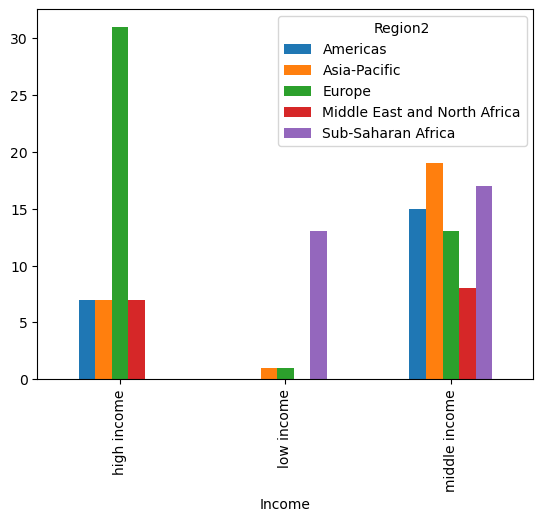

In [15]:
df.groupby('Income')['Region2'].value_counts().unstack().plot(kind='bar')
# столбчатая диаграмма с группировкой
# длина столбцов отражает частоту

<Axes: xlabel='Income'>

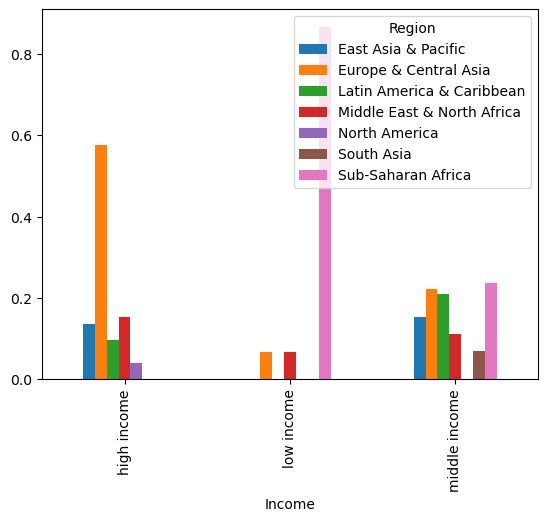

In [16]:
df.groupby('Income')['Region'].value_counts(normalize=True).unstack().plot(kind='bar')
# столбчатая диаграмма с группировкой
# длина столбцов отражает процент

<Axes: xlabel='Region2'>

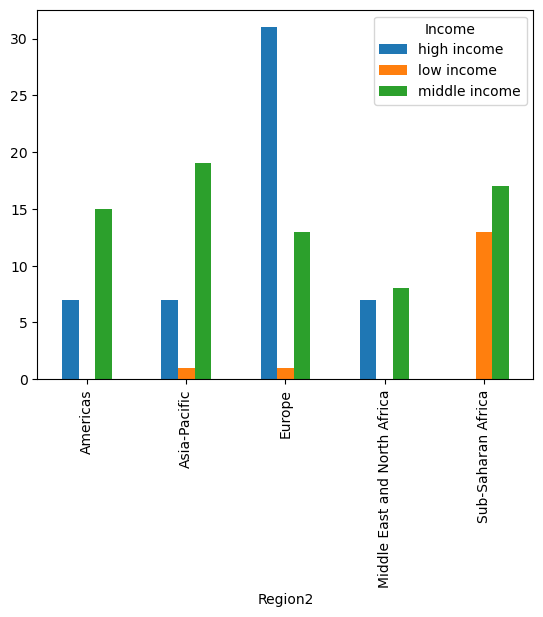

In [17]:
df.groupby('Region2')['Income'].value_counts().unstack().plot(kind='bar')
# группирующая и основная переменная заменены местами
# длина столбцов отражает частоту

<Axes: xlabel='Region2'>

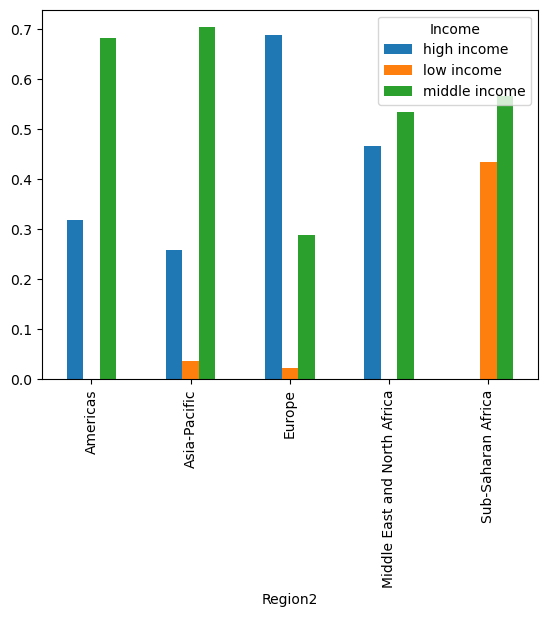

In [18]:
df.groupby('Region2')['Income'].value_counts(normalize=True).unstack().plot(kind='bar')
# длина столбцов отражает процент

## 2. Тест Хи-квадрат <a class="anchor" id="chapter2"></a>

**Членство в Европейском союзе и участие в ОЭСР**

In [19]:
ct_income_oecd = pd.crosstab(df['European Union'], df['OECD members'])
ct_income_oecd
# сохраним таблицу сопряжённости в переменную 

OECD members,0,1
European Union,,
0,96,16
1,5,22


In [20]:
stats.chi2_contingency(ct_income_oecd)

Chi2ContingencyResult(statistic=46.12616772524684, pvalue=1.1087758976426808e-11, dof=1, expected_freq=array([[81.38129496, 30.61870504],
       [19.61870504,  7.38129496]]))

chi2 = 46.12616772524684

p-value = 1.1087758976426808e-11 (это очень маленькое число)

[Подробнее про экспоненциальную запись](https://ru.ruwiki.ru/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D1%8C)

array - содержит ожидаемые частоты (для применения теста Хи-квадрат не более 5% ячеек должны содержать ожидаемую частоту меньше 5)

В нашей таблице нет ожидаемых частот менее 5, значит тест Хи-квадрат применим.

In [21]:
print('chi2 = ', stats.chi2_contingency(ct_income_oecd)[0], '   p-value =', stats.chi2_contingency(ct_income_oecd)[1])

chi2 =  46.12616772524684    p-value = 1.1087758976426808e-11


## Выводы

H0: отсутствует взаимосвязь между членством в Европейском союзе и участием в ОЭСР

H1: существует взаимосвязь между членством в Европейском союзе и участием в ОЭСР

p-value < 0.05 (стандартный уровень значимости - 5%)

p-value < 0.01

Гипотеза H1 принимается на уровне значимости 1%.

**Показатель "Business environment_2022" и регион расположения страны**

In [22]:
ct_be_region = pd.crosstab(df['Business environment_2022'], df['Region'])
ct_be_region

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Business environment_2022,,,,,,,
0.0,0,0,0,1,0,0,1
0.8,0,1,0,0,0,0,0
13.3,0,0,0,1,0,0,0
14.5,0,0,1,0,0,0,0
17.9,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
82.1,1,0,0,0,0,0,0
85.8,0,1,0,0,0,0,0
86.8,0,1,0,0,0,0,0


In [23]:
stats.chi2_contingency(ct_be_region)

Chi2ContingencyResult(statistic=729.1177756918371, pvalue=0.23197988655562385, dof=702, expected_freq=array([[0.25757576, 0.71212121, 0.27272727, 0.24242424, 0.03030303,
        0.07575758, 0.40909091],
       [0.12878788, 0.35606061, 0.13636364, 0.12121212, 0.01515152,
        0.03787879, 0.20454545],
       [0.12878788, 0.35606061, 0.13636364, 0.12121212, 0.01515152,
        0.03787879, 0.20454545],
       [0.12878788, 0.35606061, 0.13636364, 0.12121212, 0.01515152,
        0.03787879, 0.20454545],
       [0.12878788, 0.35606061, 0.13636364, 0.12121212, 0.01515152,
        0.03787879, 0.20454545],
       [0.12878788, 0.35606061, 0.13636364, 0.12121212, 0.01515152,
        0.03787879, 0.20454545],
       [0.12878788, 0.35606061, 0.13636364, 0.12121212, 0.01515152,
        0.03787879, 0.20454545],
       [0.12878788, 0.35606061, 0.13636364, 0.12121212, 0.01515152,
        0.03787879, 0.20454545],
       [0.25757576, 0.71212121, 0.27272727, 0.24242424, 0.03030303,
        0.07575758, 0.

Обратите внимание, что статистический тест Хи-квадрат в данном случае не применим. У нас недостаточно частот в каждой ячейке таблицы сопряженности, чтобы сделать выводы о взаимосвязи между переменными. В данном случае нужно применить другой статистический тест для оценки взаимосвязи.

## 3. Тесты на нормальность <a class="anchor" id="chapter3"></a>

### Тест на нормальность Шапиро-Вилка

Проверим на нормальность переменную **Information and Communications Technology services exports, % total trade_2022**

In [24]:
stats.shapiro(df['Information and Communications Technology services exports, % total trade_2022'].dropna())

ShapiroResult(statistic=0.758993923664093, pvalue=1.917957437834461e-13)

H0: Распределение значений переменной "Экспорт услуг в сфере информационно-коммуникационных технологий, % от общего объема" статистически значимо не отличается от нормального распределения.

H1: Распределение значений переменной "Экспорт услуг в сфере информационно-коммуникационных технологий, % от общего объема" статистически значимо отличается от нормального распределения.

Вывод: поскольку p-value < 0.05, гипотеза H1 принимается => распределение статистически значимо отличается от нормального

<Axes: xlabel='Information and Communications Technology services exports, % total trade_2022', ylabel='Density'>

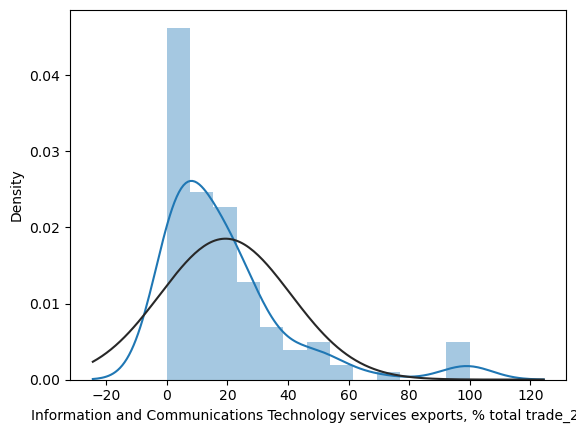

In [25]:
sns.distplot(df['Information and Communications Technology services exports, % total trade_2022'].dropna(), fit=norm) 

В дополнение к построению графика распределения переменной, мы можем использовать график квантиль-квантиль (Q-Q) для оценки отклонения исходных данных от теоретического (нормального, в данном случае) распределения.

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

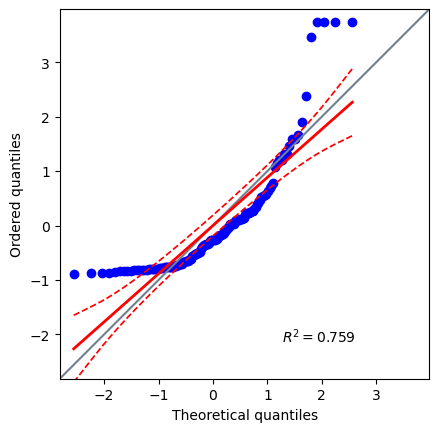

In [26]:
pg.qqplot(df['Information and Communications Technology services exports, % total trade_2022'], dist = 'norm')

На графике видно, что квантили в наших данных заметно отличаются от квантилей нормального распределения. R^2 — это коэффициент детерминации, который измеряет качество соответствия линейной модели — красной линии — нашим данным и, следовательно, оценивает, насколько хорошо данное отношение может быть аппроксимировано линейной функцией. Чем лучше линейная модель соответствует данным, тем более похожи два распределения. В данном случае график показывает, что эмпирическое распределение далеко от нормального. Это дополнительно подтверждается гистограммой и статистическим тестом выше.

### ! Но для выборки размером более 50 целесообразно применить тест на нормальность Колмогорова-Смирнова.

### Тест на нормальность Колмогорова-Смирнова

Проверим на нормальность переменную **University-industry R&D collaboration_2022**

In [27]:
stats.kstest(df['University-industry R&D collaboration_2022'].dropna(), 'norm', args=(df['University-industry R&D collaboration_2022'].dropna().mean(), df['University-industry R&D collaboration_2022'].dropna().std()))

KstestResult(statistic=0.06285755871505036, pvalue=0.6505715098926618, statistic_location=29.0, statistic_sign=-1)

H0: Распределение значений переменной "Сотрудничество университетов и промышленности в области НИОКР" статистически значимо не отличается от нормального распределения.

H1: Распределение значений переменной "Сотрудничество университетов и промышленности в области НИОКР" статистически значимо отличается от нормального распределения.

Вывод: поскольку p-value > 0.05, гипотеза H1 отвергается, а H0 не отвергается => распределение статистически значимо не отличается от нормального

<Axes: xlabel='University-industry R&D collaboration_2022', ylabel='Density'>

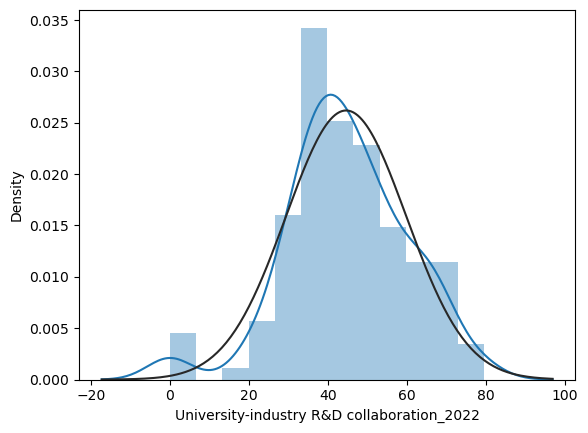

In [28]:
sns.distplot(df['University-industry R&D collaboration_2022'].dropna(), fit=norm) 

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

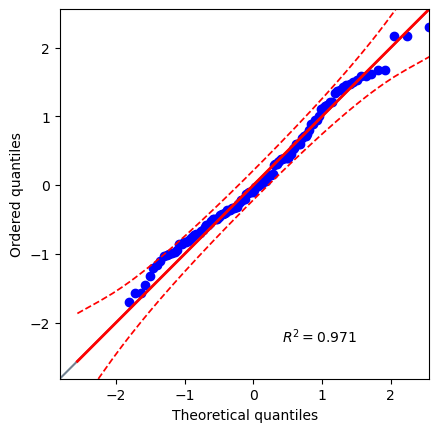

In [29]:
pg.qqplot(df['University-industry R&D collaboration_2022'], dist = 'norm')

Проверим на нормальность переменную **Information and Communications Technology use_2022**

In [30]:
stats.kstest(df['Information and Communications Technology use_2022'].dropna(), 'norm', args=(df['Information and Communications Technology use_2022'].dropna().mean(), df['Information and Communications Technology use_2022'].dropna().std()))
# распределение отличается от нормального

KstestResult(statistic=0.13715514990599909, pvalue=0.01255647340989818, statistic_location=71.0, statistic_sign=-1)

<Axes: xlabel='Information and Communications Technology use_2022', ylabel='Density'>

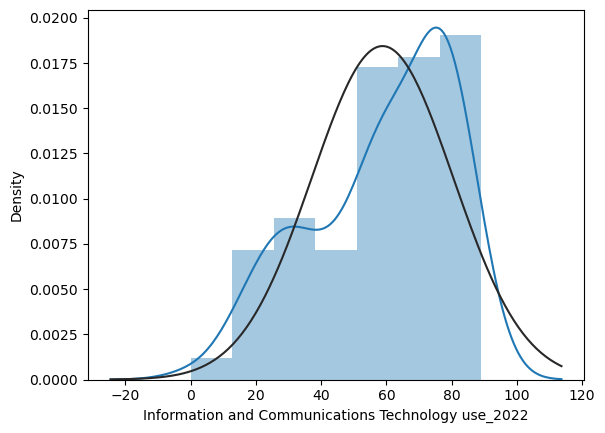

In [31]:
sns.distplot(df['Information and Communications Technology use_2022'].dropna(), fit=norm) 

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

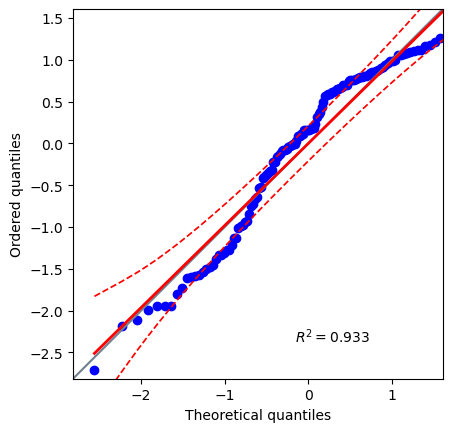

In [32]:
pg.qqplot(df['Information and Communications Technology use_2022'], dist = 'norm')

Проверим на нормальность переменную **High-tech manufacturing, %_2022**

In [33]:
stats.kstest(df['High-tech manufacturing, %_2022'].dropna(), 'norm', args=(df['High-tech manufacturing, %_2022'].dropna().mean(), df['High-tech manufacturing, %_2022'].dropna().std()))
# распределение отличается от нормального

KstestResult(statistic=0.1286546983117936, pvalue=0.02301697134158888, statistic_location=0.0, statistic_sign=-1)

<Axes: xlabel='High-tech manufacturing, %_2022', ylabel='Density'>

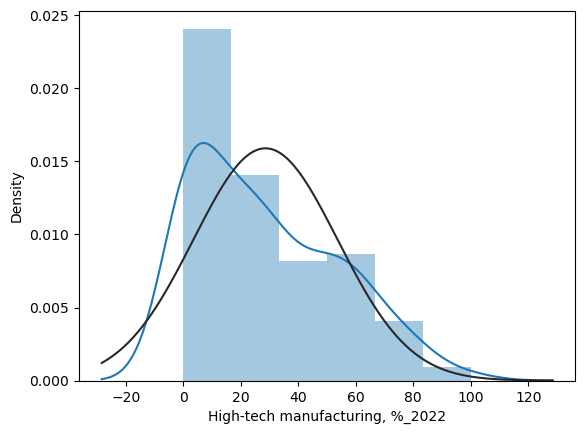

In [34]:
sns.distplot(df['High-tech manufacturing, %_2022'].dropna(), fit=norm) 

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

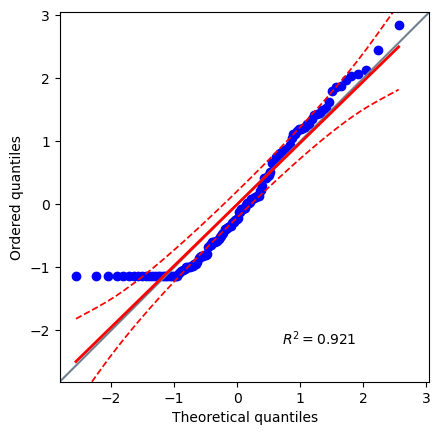

In [35]:
pg.qqplot(df['High-tech manufacturing, %_2022'], dist = 'norm')

Проверим на нормальность переменную **Government effectiveness_2022**

In [36]:
stats.kstest(df['Government effectiveness_2022'].dropna(), 'norm', args=(df['Government effectiveness_2022'].dropna().mean(), df['Government effectiveness_2022'].dropna().std()))
# распределение не отличается от нормального

KstestResult(statistic=0.0793056239165289, pvalue=0.35864047824821477, statistic_location=53.0, statistic_sign=1)

<Axes: xlabel='Government effectiveness_2022', ylabel='Density'>

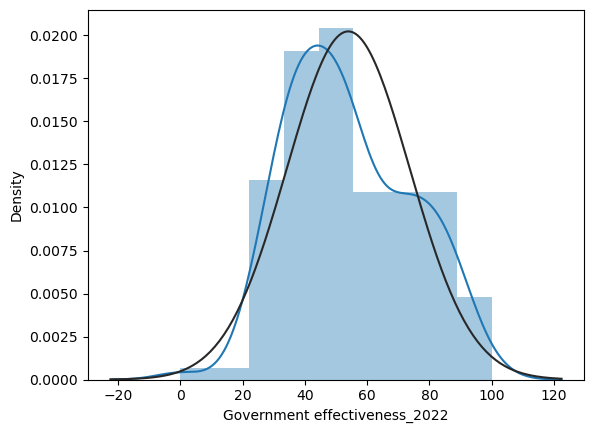

In [37]:
sns.distplot(df['Government effectiveness_2022'].dropna(), fit=norm) 

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

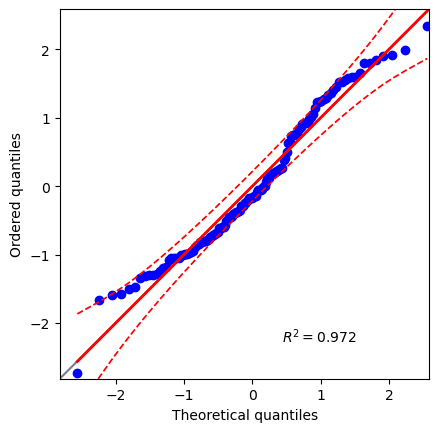

In [38]:
pg.qqplot(df['Government effectiveness_2022'], dist = 'norm')

Проверим на нормальность переменную **Business environment_2022**

In [39]:
stats.kstest(df['Business environment_2022'].dropna(), 'norm', args=(df['Business environment_2022'].dropna().mean(), df['Business environment_2022'].dropna().std()))
# распределение не отличается от нормального

KstestResult(statistic=0.042580660762039146, pvalue=0.9621605872389752, statistic_location=56.7, statistic_sign=1)

<Axes: xlabel='Business environment_2022', ylabel='Density'>

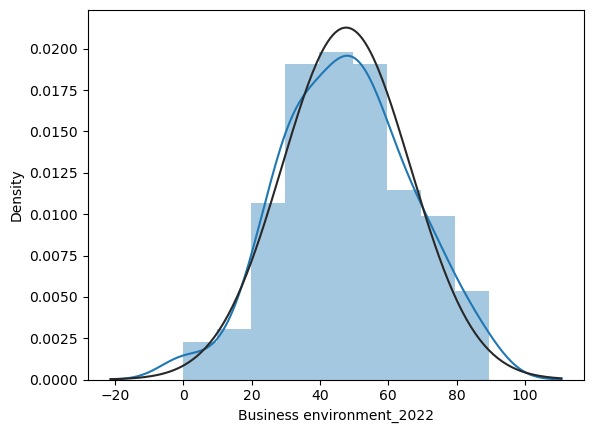

In [40]:
sns.distplot(df['Business environment_2022'].dropna(), fit=norm) 

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

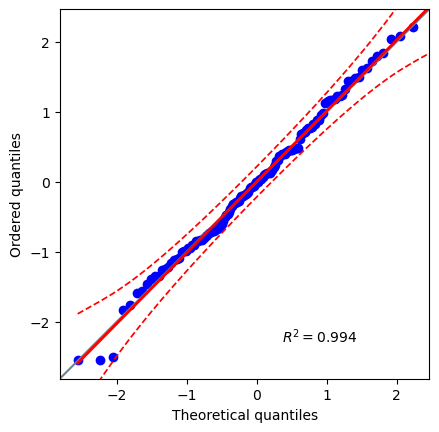

In [41]:
pg.qqplot(df['Business environment_2022'], dist = 'norm')

Проверим на нормальность переменную **Creative goods and services_2022**

In [42]:
stats.kstest(df['Creative goods and services_2022'].dropna(), 'norm', args=(df['Creative goods and services_2022'].dropna().mean(), df['Creative goods and services_2022'].dropna().std()))
# распределение не отличается от нормального

KstestResult(statistic=0.1059332353284872, pvalue=0.09606350812447681, statistic_location=7.9, statistic_sign=1)

Мы проанализировали распределение значений нескольких переменных. Четыре из них имеют распределения, которые статистически значимо не отличаются от нормального распределения, остальные переменные имеют распределения, которые статистически значимо отличаются от нормального распределения.

## 4. Парная корреляция <a class="anchor" id="chapter4"></a>

### Коэффициент корреляции Пирсона

In [43]:
df.corr(numeric_only=True) 
# рассчитываются коэффициенты корреляции Пирсона между всеми возможными парами числовых переменных
# это плохое решение, потому что для расчета взаимосвязи между определенными парами переменных датасета этот коэффициент не подходит
# по диагонали всегда 1, это корреляция переменной с самой собой

,Business environment_2020,Business environment_2021,Business environment_2022,Business sophistication index_2020,Business sophistication index_2021,Business sophistication index_2022,Citable documents H-index_2020,Citable documents H-index_2021,Citable documents H-index_2022,Creative goods and services_2020,...,"Tertiary enrolment, % gross_2021","Tertiary enrolment, % gross_2022",University-industry R&D collaboration_2020,University-industry R&D collaboration_2021,University-industry R&D collaboration_2022,Euro area,European Union,OECD members,Least developed countries,High income
Business environment_2020,1.000000,1.000000,0.374400,0.645183,0.652948,0.686277,0.613813,0.613944,0.606913,0.472930,...,0.577426,0.543785,0.485420,0.498880,0.516637,0.346680,0.401291,0.594219,-0.394077,0.565094
Business environment_2021,1.000000,1.000000,0.381639,0.645183,0.656416,0.690642,0.613813,0.614306,0.607441,0.472930,...,0.583946,0.551974,0.485420,0.514098,0.532889,0.346186,0.400942,0.591192,-0.419708,0.565326
Business environment_2022,0.374400,0.381639,1.000000,0.500275,0.502070,0.523083,0.360508,0.368032,0.376547,0.463312,...,0.241300,0.273803,0.648155,0.685761,0.759305,0.153601,0.104429,0.315914,-0.198400,0.420853
Business sophistication index_2020,0.645183,0.645183,0.500275,1.000000,0.990146,0.976785,0.764934,0.766761,0.765421,0.728315,...,0.596799,0.556469,0.747689,0.745958,0.719563,0.406886,0.486120,0.688329,-0.376083,0.677409
Business sophistication index_2021,0.652948,0.656416,0.502070,0.990146,1.000000,0.983350,0.767656,0.770736,0.769207,0.737732,...,0.615734,0.578060,0.732183,0.742292,0.716682,0.422518,0.496682,0.697299,-0.411743,0.666980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Euro area,0.346680,0.346186,0.153601,0.406886,0.422518,0.449959,0.306666,0.307489,0.307628,0.337721,...,0.413153,0.410609,0.259445,0.267817,0.236539,1.000000,0.834966,0.530387,-0.196648,0.530273
European Union,0.401291,0.400942,0.104429,0.486120,0.496682,0.528001,0.355093,0.356811,0.356881,0.423584,...,0.450987,0.450607,0.289466,0.297090,0.274629,0.834966,1.000000,0.596459,-0.235516,0.597503
OECD members,0.594219,0.591192,0.315914,0.688329,0.697299,0.710892,0.687717,0.688251,0.684447,0.553040,...,0.598500,0.568779,0.517930,0.531768,0.498992,0.530387,0.596459,1.000000,-0.294224,0.659962
Least developed countries,-0.394077,-0.419708,-0.198400,-0.376083,-0.411743,-0.460060,-0.294624,-0.306719,-0.328444,-0.372494,...,-0.553622,-0.558450,-0.320976,-0.338004,-0.344103,-0.196648,-0.235516,-0.294224,1.000000,-0.370842


Коэффициент корреляции Пирсона можно рассчитать для оценки взаимосвязи между метрическими переменными, распределения значений которых статистически значимо не отличаются от нормального.

In [44]:
df['University-industry R&D collaboration_2022'].corr(df['Government effectiveness_2022']) 
# наблюдается сильная положительная корреляция между переменными

0.7354650445262583

<Axes: xlabel='University-industry R&D collaboration_2022', ylabel='Government effectiveness_2022'>

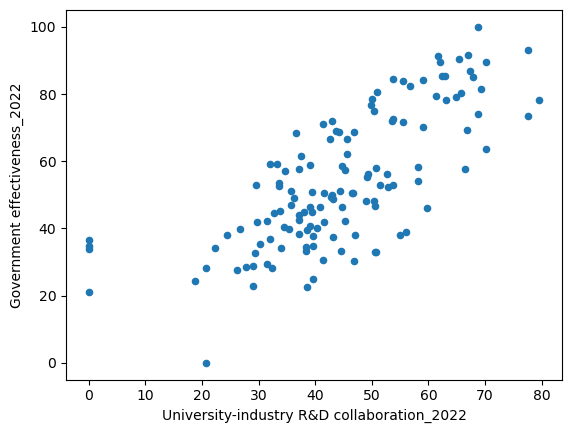

In [45]:
df.plot('University-industry R&D collaboration_2022', 'Government effectiveness_2022', kind='scatter')

In [46]:
df[['Creative goods and services_2022','Business environment_2022','Government effectiveness_2022']].corrwith(df['University-industry R&D collaboration_2022'])
# Коэффициенты корреляции Персона между переменной University-industry R&D collaboration_2022 и 3-мя другими 
# все переменные имеют распределение, близкое к нормальному

Creative goods and services_2022    0.544774
Business environment_2022           0.759305
Government effectiveness_2022       0.735465
dtype: float64

In [47]:
df[['Creative goods and services_2022','Business environment_2022','Government effectiveness_2022']].corrwith(df['University-industry R&D collaboration_2022']).sort_values()
# коэффициенты корреляции отсортированы по возрастанию

Creative goods and services_2022    0.544774
Government effectiveness_2022       0.735465
Business environment_2022           0.759305
dtype: float64

In [48]:
df[['Creative goods and services_2022','Business environment_2022','Government effectiveness_2022', 'University-industry R&D collaboration_2022']].corr()
# корреляционная матрица на основе 4 переменных

,Creative goods and services_2022,Business environment_2022,Government effectiveness_2022,University-industry R&D collaboration_2022
Creative goods and services_2022,1.000000,0.400947,0.687971,0.544774
Business environment_2022,0.400947,1.000000,0.674534,0.759305
Government effectiveness_2022,0.687971,0.674534,1.000000,0.735465
University-industry R&D collaboration_2022,0.544774,0.759305,0.735465,1.000000


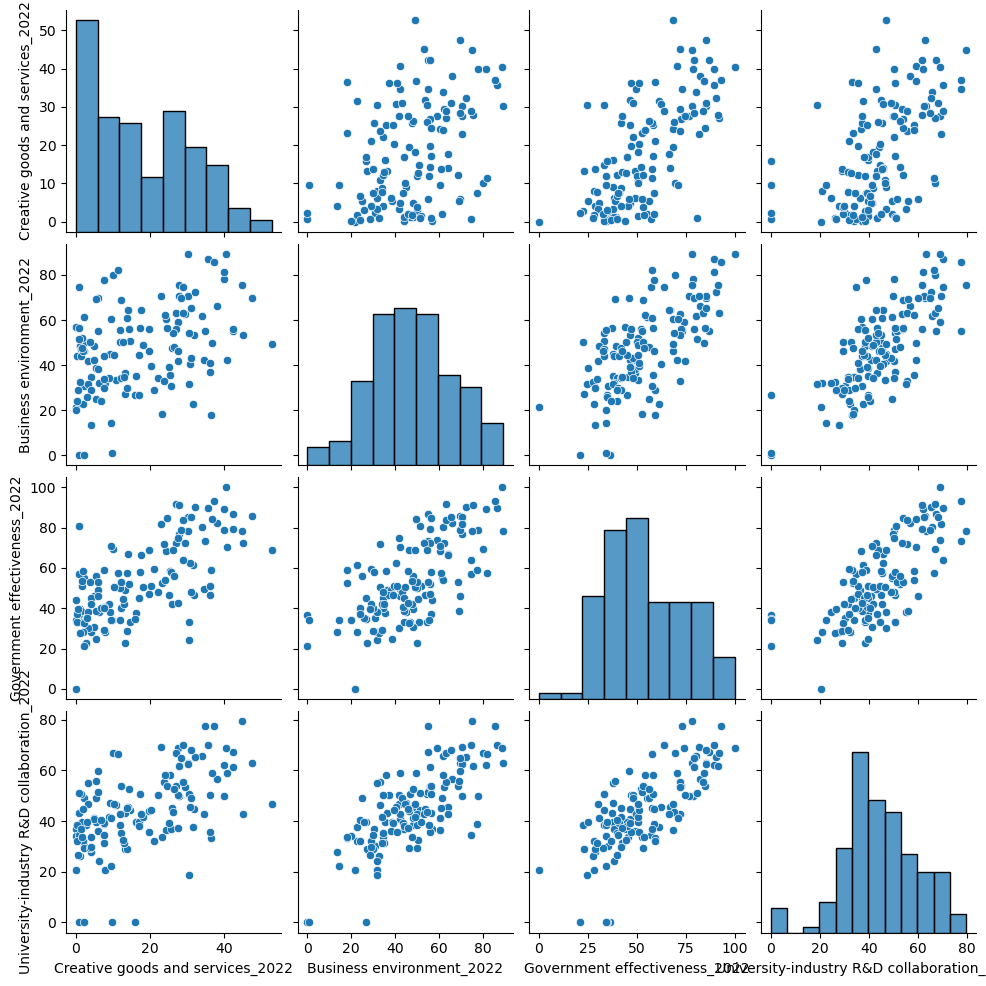

In [49]:
sns.pairplot(df[['Creative goods and services_2022','Business environment_2022','Government effectiveness_2022', 'University-industry R&D collaboration_2022']]) 
# матрица диаграмм рассеяния

In [51]:
df[['Creative goods and services_2022','Business environment_2022','Government effectiveness_2022', 
    'University-industry R&D collaboration_2022']].corr().stack()
# содержимое корреляционной матрицы представлено как одномерный ряд

Creative goods and services_2022            Creative goods and services_2022              1.000000
                                            Business environment_2022                     0.400947
                                            Government effectiveness_2022                 0.687971
                                            University-industry R&D collaboration_2022    0.544774
Business environment_2022                   Creative goods and services_2022              0.400947
                                            Business environment_2022                     1.000000
                                            Government effectiveness_2022                 0.674534
                                            University-industry R&D collaboration_2022    0.759305
Government effectiveness_2022               Creative goods and services_2022              0.687971
                                            Business environment_2022                     0.674534
          

In [53]:
df[['Creative goods and services_2022','Business environment_2022',
    'Government effectiveness_2022', 'University-industry R&D collaboration_2022']].corr().stack().sort_values()
# результаты отсортированы

Creative goods and services_2022            Business environment_2022                     0.400947
Business environment_2022                   Creative goods and services_2022              0.400947
Creative goods and services_2022            University-industry R&D collaboration_2022    0.544774
University-industry R&D collaboration_2022  Creative goods and services_2022              0.544774
Business environment_2022                   Government effectiveness_2022                 0.674534
Government effectiveness_2022               Business environment_2022                     0.674534
Creative goods and services_2022            Government effectiveness_2022                 0.687971
Government effectiveness_2022               Creative goods and services_2022              0.687971
                                            University-industry R&D collaboration_2022    0.735465
University-industry R&D collaboration_2022  Government effectiveness_2022                 0.735465
Business e

### Статистическая значимость коэффициента корреляции Пирсона

In [54]:
stats.pearsonr(df['University-industry R&D collaboration_2022'].dropna(), df['Business environment_2022'].dropna())

PearsonRResult(statistic=0.7593053875329312, pvalue=5.056226771673954e-26)

In [55]:
print("Pearson's r:", stats.pearsonr(df['University-industry R&D collaboration_2022'].dropna(), df['Business environment_2022'].dropna())[0], 
       '    p-value:', stats.pearsonr(df['University-industry R&D collaboration_2022'].dropna(), df['Business environment_2022'].dropna())[1])

Pearson's r: 0.7593053875329312     p-value: 5.056226771673954e-26


Переменные **University-industry R&D collaboration** и **Business environment** являются метрическими; распределения их значений не отличаются от нормального. Поэтому для оценки взаимосвязи между ними мы можем рассчитать коэффициент корреляции Пирсона.

H0: нет взаимосвязи между сотрудничеством университетов и промышленности в области НИОКР и бизнес-средой (r = 0)

H1: существует взаимосвязь связь между сотрудничеством университетов и промышленности в области НИОКР и бизнес-средой в 2022 году (r != 0)

1. Статистическая значимость взаимосвязи: поскольку p-value < 0.05, гипотеза H1 подтвердилась.
2. Направление взаимосвязи: коэффициент корреляции положительный, следовательно, между переменными наблюдается прямая взаимосвязь.
3. Сила взаимосвязи: коэффициент корреляции равен 0.76, следовательно, между переменными наблюдается сильная корреляция. 

Можно сделать вывод, что благоприятная бизнес-среда способствует развитию сотрудничества между университетами и индустрии в области научных исследований. 

Text(0.5, 1.0, 'Pearson correlation')

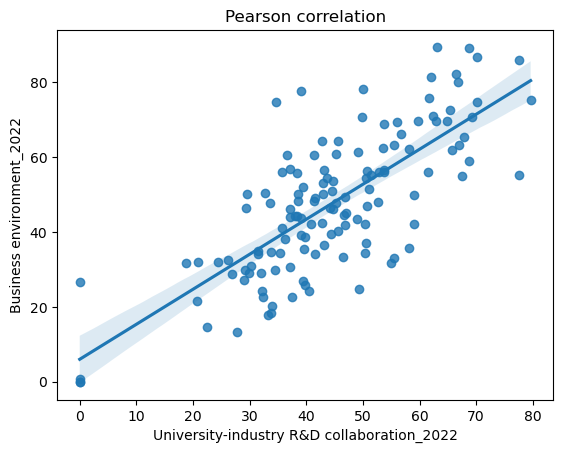

In [56]:
sns.regplot(df, x = 'University-industry R&D collaboration_2022', y = 'Business environment_2022').set_title('Pearson correlation')

### Коэффициент корреляции Спирмена и его статистическая значимость

In [57]:
df1 = df.dropna(subset=['Information and Communications Technology use_2022', 'High-tech manufacturing, %_2022'])
# удаление наблюдений, содержащих пропуски хотя бы по одной из анализируемых переменных
stats.spearmanr(df1['Information and Communications Technology use_2022'], df1['High-tech manufacturing, %_2022'])

SignificanceResult(statistic=0.6749691181222638, pvalue=7.023352609224242e-19)

Переменные **Information and Communications Technology use** и **High-tech manufacturing, %** являются метрическими, но их распределения отличаются от нормального. Поэтому для оценки взаимосвязи между ними лучше рассчитать коэффициенты ранговой корреляции (Спирмена или Кендалла). Поскольку значения каждой переменной в основном уникальны, и когда мы проранжируем страны по ним, мы не получим или получим небольшое количество связанных рангов, коэффициент корреляции Спирмена является предпочтительным.

H0: нет взаимосвязи между использованием информационно-коммуникационных технологий и высокотехнологичным производством в 2022 году (r = 0)

H1: существует взаимосвязь между использованием информационно-коммуникационных технологий и высокотехнологичным производством в 2022 году (r != 0)

1. Статистическая значимость взаимосвязи: поскольку p-value < 0.05, гипотеза H1 подтвердилась.
2. Направление взаимосвязи: коэффициент корреляции положительный, следовательно, между переменными наблюдается прямая взаимосвязь.
3. Сила взаимосвязи: коэффициент корреляции равен 0.67, следовательно, между переменными наблюдается средняя корреляция. 

In [58]:
df[['Information and Communications Technology use_2022','High-tech manufacturing, %_2022','University-industry R&D collaboration_2022']].corr('spearman') 
# матрица коэффициентов корреляции Спирмена

,Information and Communications Technology use_2022,"High-tech manufacturing, %_2022",University-industry R&D collaboration_2022
Information and Communications Technology use_2022,1.000000,0.674969,0.616121
"High-tech manufacturing, %_2022",0.674969,1.000000,0.544839
University-industry R&D collaboration_2022,0.616121,0.544839,1.000000


<Axes: xlabel='Information and Communications Technology use_2022', ylabel='High-tech manufacturing, %_2022'>

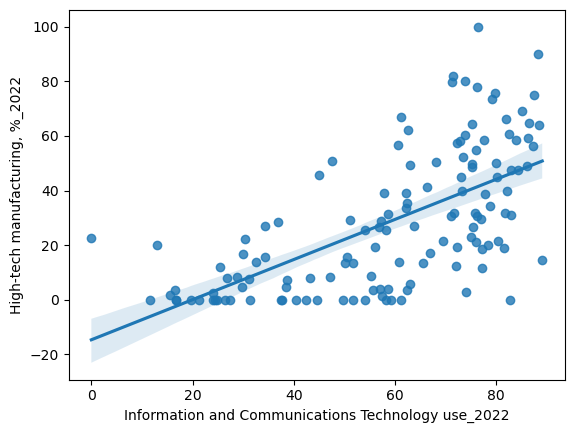

In [59]:
sns.regplot(data = df1, x = 'Information and Communications Technology use_2022', y = 'High-tech manufacturing, %_2022')

### Коэффициент корреляции Кендалла и его статистическая значимость

In [60]:
df = pd.read_excel('WIPO-GII.xlsx')
df['Income'].value_counts()

Income
middle income    72
high income      52
low income       15
Name: count, dtype: int64

In [61]:
df['Income']=df['Income'].replace('low income', 1)
df['Income']=df['Income'].replace('middle income', 2)
df['Income']=df['Income'].replace('high income', 3)
df['Income'].value_counts()
# перекодирование переменной из текстовой в числовую 

Income
2    72
3    52
1    15
Name: count, dtype: int64

In [62]:
df1 = df.dropna(subset=['Income', 'University-industry R&D collaboration_2022'])
# удаление наблюдений, содержащих пропуски хотя бы по одной из анализируемых переменных
stats.kendalltau(df1.Income, df1['University-industry R&D collaboration_2022'])

SignificanceResult(statistic=0.43833419909418553, pvalue=2.4846308818292997e-10)

Переменная **University-industry R&D collaboration_2022** — это метрическая переменная, распределение ее значений отличается от нормального. **Income** — это категориальная переменная с порядковой шкалой измерения. Поэтому для оценки взаимосвязи между ними лучше рассчитать коэффициенты ранговой корреляции (Спирмена или Кендалла). Поскольку большинство значений переменной Income не являются уникальными, при ранжировании стран по этой переменной, получится много связанных рангов, коэффициент корреляции Кендалла является предпочтительным.

H0: нет взаимосвязи между доходом стран и сотрудничеством университетов и промышленности в области НИОКР в 2022 году (r = 0)

H1: существует взаимосвязь между доходом стран и сотрудничеством университетов и промышленности в области НИОКР в 2022 году (r != 0)

1. Статистическая значимость взаимосвязи: поскольку p-value < 0.05, гипотеза H1 подтвердилась.
2. Направление взаимосвязи: коэффициент корреляции положительный, следовательно, между переменными наблюдается прямая взаимосвязь.
3. Сила взаимосвязи: коэффициент корреляции равен 0.44, следовательно, между переменными наблюдается слабая корреляция. 

In [63]:
df[['Income','University-industry R&D collaboration_2022','Information and Communications Technology use_2022']].corr('kendall') 
# матрица коэффициентов корреляции Кендалла

,Income,University-industry R&D collaboration_2022,Information and Communications Technology use_2022
Income,1.000000,0.438334,0.717396
University-industry R&D collaboration_2022,0.438334,1.000000,0.437374
Information and Communications Technology use_2022,0.717396,0.437374,1.000000


### Точечно-бисериальная корреляция

In [64]:
df = pd.read_excel('WIPO-GII.xlsx')

In [65]:
df_clean = df.dropna(subset=['University-industry R&D collaboration_2022', 'High income'])
pb, pval = pointbiserialr(df_clean['University-industry R&D collaboration_2022'], df_clean['High income'])
print(f'Point-biserial correlation: {np.round(pb, 4)}, pvalue = {np.round(pval, 4)}')
# наблюдается статистически значимая средняя корреляция

Point-biserial correlation: 0.5275, pvalue = 0.0


Text(0.5, 1.0, 'Point-biserial correlation')

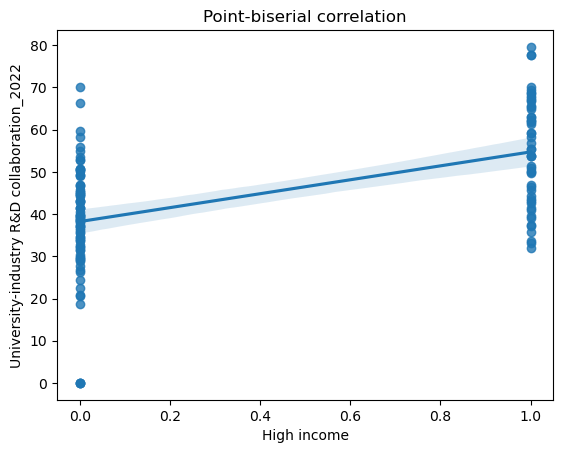

In [66]:
sns.regplot(data = df_clean, x = 'High income', y = 'University-industry R&D collaboration_2022').set_title('Point-biserial correlation')

### Коэффициент Фи

Подходит для оценки взаимосвязи связи между двумя бинарными переменными. 

In [68]:
def phi_corrrelation(data: pd.DataFrame, x: str, y: str):
    chi = pd.crosstab(index=data[x], 
                           columns=data[y], margins = True).values
    phi = (chi[0, 0] * chi[1, 1] - chi[1, 0] * chi[0, 1]) / np.sqrt(chi[1, 2] * chi[2, 1] * chi[2, 0] * chi[0, 2])
    return phi

In [69]:
phi_corrrelation(df, 'High income', 'Least developed countries')
# наблюдается обратная слабая корреляция

-0.3708424979352351

## 5. Частная корреляция <a class="anchor" id="chapter5"></a>

Рассчитаем парный коэффициент корреляции между сотрудничеством университетов и промышленности в сфере НИОКР и бизнес-средой в 2022 году.

In [70]:
stats.pearsonr(df['University-industry R&D collaboration_2022'].dropna(), df['Business environment_2022'].dropna())

PearsonRResult(statistic=0.7593053875329312, pvalue=5.056226771673954e-26)

Теперь проконтролируем влияние на эту корреляцию переменной **High-tech manufacturing, %_2022**

In [71]:
df = df.dropna(subset=['High-tech manufacturing, %_2022', 'University-industry R&D collaboration_2022', 'Business environment_2022'])
r_xy = stats.pearsonr(df['University-industry R&D collaboration_2022'], df['Business environment_2022'])[0]
r_xz = stats.pearsonr(df['University-industry R&D collaboration_2022'], df['High-tech manufacturing, %_2022'])[0]
r_yz = stats.pearsonr(df['Business environment_2022'], df['High-tech manufacturing, %_2022'])[0]
r_xy_z = (r_xy - r_xz * r_yz) / sqrt((1 - r_xz ** 2) * (1 - r_yz ** 2))
print('Парный коэффициент корреляции между  University-industry R&D collaboration и Business environment в 2022: ',r_xy)
print('Частный коэффициент корреляции между  University-industry R&D collaboration и Business environment в 2022, с исключением влияния High-tech manufacturing: ',r_xy_z)

Парный коэффициент корреляции между  University-industry R&D collaboration и Business environment в 2022:  0.7593053875329312
Частный коэффициент корреляции между  University-industry R&D collaboration и Business environment в 2022, с исключением влияния High-tech manufacturing:  0.7454224834023446


In [73]:
pg.partial_corr(data=df, x='University-industry R&D collaboration_2022', 
                y='Business environment_2022', covar='High-tech manufacturing, %_2022')
# такой же результат с помощью библиотеки pingouin

,n,r,CI95%,p-val
pearson,132,0.745422,"[0.66, 0.81]",1.773242e-24


In [75]:
pg.partial_corr(data=df, x='Business environment_2022', 
                y='University-industry R&D collaboration_2022', 
                covar='High-tech manufacturing, %_2022', method = 'spearman')

,n,r,CI95%,p-val
spearman,132,0.702864,"[0.6, 0.78]",8.172177e-21


Можно сделать вывод, что корреляция между сотрудничеством университетов и промышленности в области НИОКР и бизнес-средой существенно не изменилась после того, как мы исключили влияние на их корреляцию переменной, характеризующей высокотехнологичное производство.

Рассмотрим результаты исследования отношения к приезжим рабочим, проведенного в Германии.

3 переменные:
1) Возраст (age);
2) Отношение к приезжим рабочим (newcomer, от 0 до 30, чем больше значение, тем более негативное отношение);
3) Частота посещения церкви (church, 1-никогда, 6-по меньшей мере 2 раза в неделю). 

In [76]:
df1 = pd.read_stata('partial.dta')
df1

,age,church,newcomer
0,56,4,17
1,80,5,16
2,64,4,19
3,65,5,19
4,48,3,17
5,41,3,14
6,44,4,21
7,43,2,16
8,57,4,17
9,62,5,18


Рассчитаем корреляцию между частотой посещения церкви и отношением к приезжим рабочим.

In [78]:
stats.kendalltau(df1.church, df1.newcomer)
# корреляция слабая, но статистически значимая

SignificanceResult(statistic=0.413158691042416, pvalue=0.0020961003342962674)

Следовательно, чем чаще респондент посещает церковь, тем хуже он относится к приезжим рабочим. Это странный результат. Проконтролируем влияние возраста на эту корреляцию.

In [79]:
pg.partial_corr(data=df1, x='church', y='newcomer', covar='age')

,n,r,CI95%,p-val
pearson,35,0.12149,"[-0.23, 0.44]",0.493692


Частная корреляция значительно меньше и статически незначима. Скорее всего негативное отношение более свойственно пожилым людям, но так получилось, что они чаще посещают церковь.

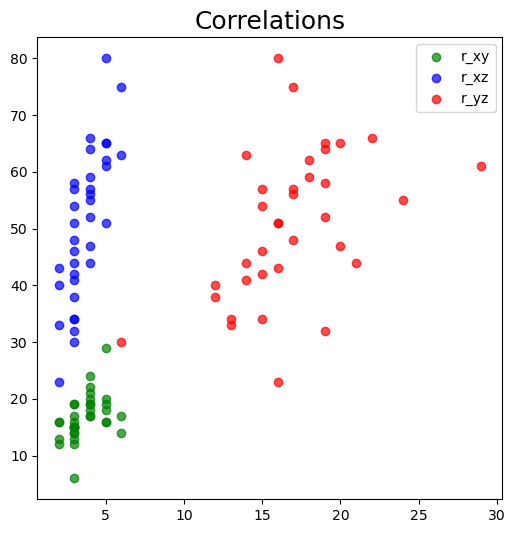

In [80]:
plt.figure(figsize=(6, 6))

plt.scatter(df1.church, df1.newcomer, c='g', alpha=0.7, label='r_xy')
plt.scatter(df1.church, df1.age, c='b', alpha=0.7, label='r_xz')
plt.scatter(df1.newcomer, df1.age, c='r', alpha=0.7, label='r_yz')
plt.title('Correlations', fontsize=18)
plt.legend()
plt.show()

## 6. Визуализация корреляций <a class="anchor" id="chapter6"></a>

In [81]:
corr = df[['Creative goods and services_2022','Business environment_2022','Government effectiveness_2022', 'University-industry R&D collaboration_2022']].dropna().corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,Creative goods and services_2022,Business environment_2022,Government effectiveness_2022,University-industry R&D collaboration_2022
Creative goods and services_2022,1.000000,0.400947,0.687971,0.544774
Business environment_2022,0.400947,1.000000,0.674534,0.759305
Government effectiveness_2022,0.687971,0.674534,1.000000,0.735465
University-industry R&D collaboration_2022,0.544774,0.759305,0.735465,1.000000


<Axes: >

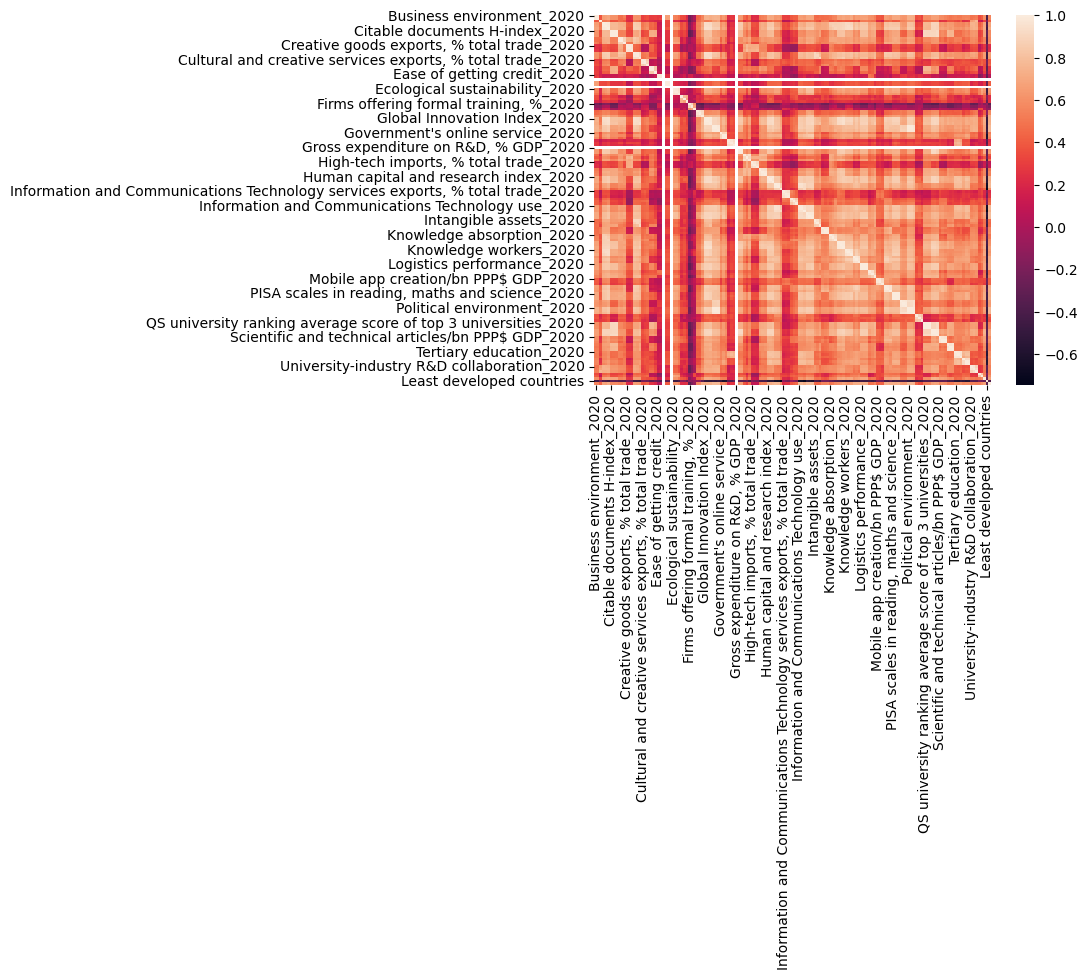

In [82]:
sns.heatmap(df.corr(numeric_only=True))  # тепловая карта

<Axes: >

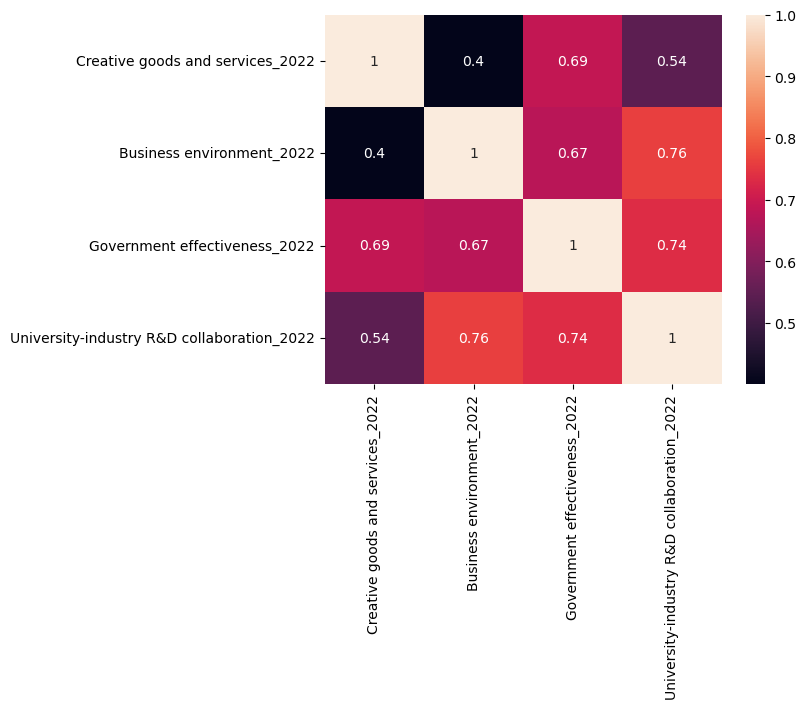

In [84]:
sns.heatmap(df[['Creative goods and services_2022','Business environment_2022','Government effectiveness_2022', 'University-industry R&D collaboration_2022']]
            .corr(), annot=True)  # с метками значений

<Axes: >

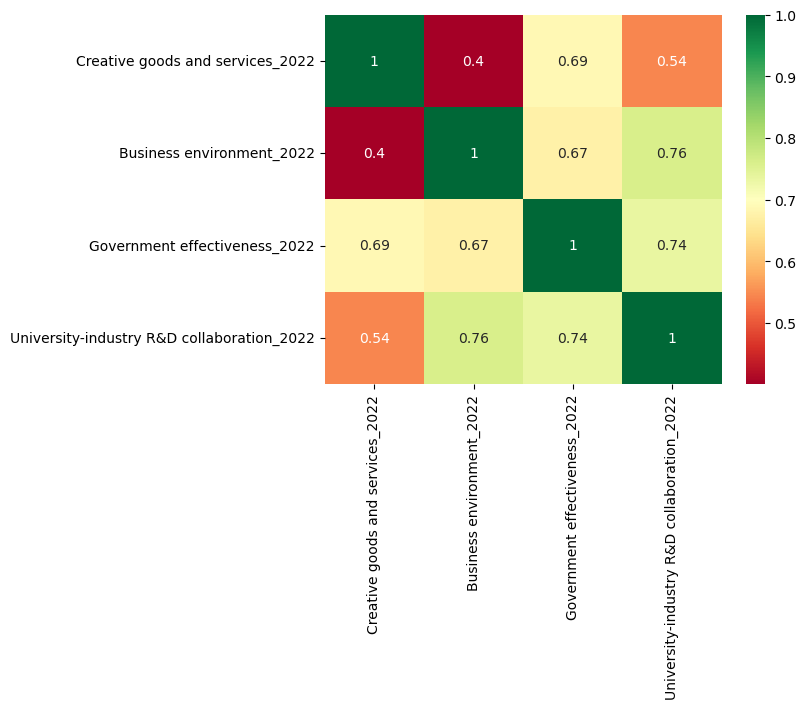

In [85]:
sns.heatmap(df[['Creative goods and services_2022','Business environment_2022','Government effectiveness_2022', 'University-industry R&D collaboration_2022']].corr(), annot=True, cmap='RdYlGn')
# другая цветовая шкала

<Axes: >

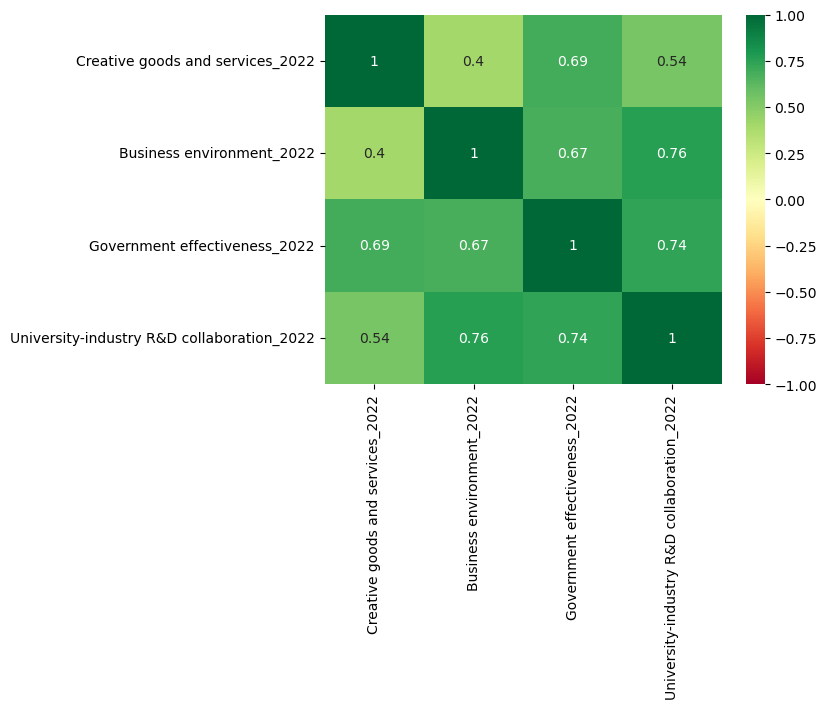

In [86]:
sns.heatmap(df[['Creative goods and services_2022','Business environment_2022','Government effectiveness_2022', 'University-industry R&D collaboration_2022']].corr(), annot=True, cmap='RdYlGn', vmax=1, vmin=-1) 
# заданы минимальные и максимальные значения шкалы

<Axes: >

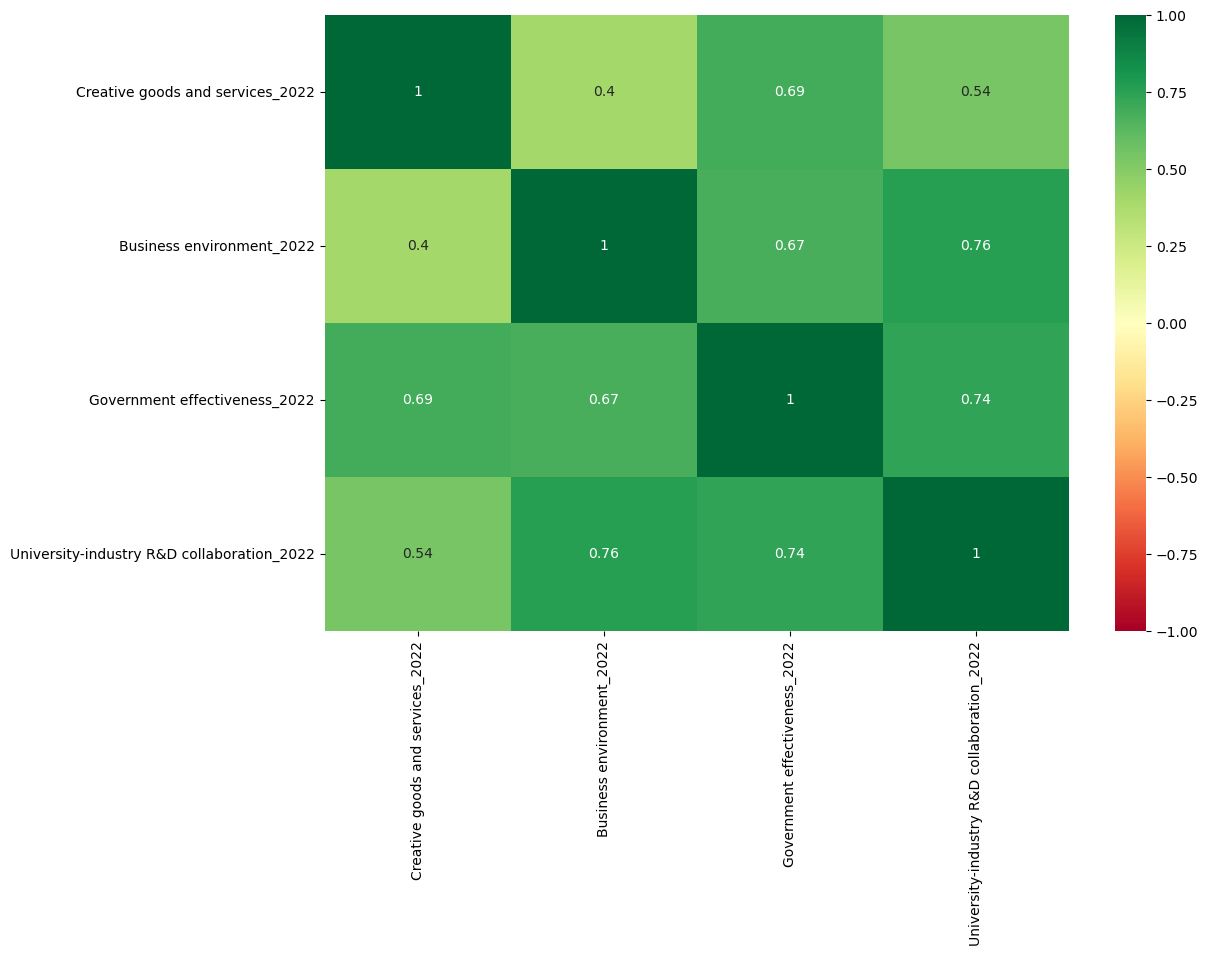

In [87]:
plt.figure(figsize=(12,8)) # скорректирован размер
sns.heatmap(df[['Creative goods and services_2022','Business environment_2022','Government effectiveness_2022', 'University-industry R&D collaboration_2022']].corr(), annot=True, cmap='RdYlGn', vmax=1, vmin=-1) 

In [88]:
df1 = df[['Creative goods and services_2022','Business environment_2022','Government effectiveness_2022', 'University-industry R&D collaboration_2022']]
rho = df1.corr()
pval = df1.corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) + p

,Creative goods and services_2022,Business environment_2022,Government effectiveness_2022,University-industry R&D collaboration_2022
Creative goods and services_2022,1.0***,0.4***,0.69***,0.54***
Business environment_2022,0.4***,1.0***,0.67***,0.76***
Government effectiveness_2022,0.69***,0.67***,1.0***,0.74***
University-industry R&D collaboration_2022,0.54***,0.76***,0.74***,1.0***


Звездочками помечена статистическая значимость: * - p < 0.1; ** - p < 0.05; *** - p < 0.01